# **Initialization**

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [245]:
# Filepath init
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

# **Exercise 1**

## Only for non missing escores

In [246]:
# Extracting the data and formatting the dataset
monthly_return = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
monthly_return_melted = monthly_return.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
monthly_return_melted.rename(columns={'NAME': 'Name'}, inplace=True)

In [247]:
# Extracting the country-region dataset and merging it to the previous one
static = pd.read_excel(filepath + 'Static.xlsx')
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')

In [248]:
# Filtering the rows of interest
df_ex1 = df_ex1[df_ex1['Region'] == 'PAC']
df_ex1 = df_ex1[(pd.to_datetime(df_ex1['year']) >= '2013-12-31') & (pd.to_datetime(df_ex1['year']) <= '2023-12-31')]

In [249]:
# Sorting to facilitate comprehension
df_ex1.sort_values(by=['Name', 'year'], inplace=True)

In [250]:
# New col with percentage change between two months
df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()

C:\Users\simon\AppData\Local\Temp\ipykernel_24488\1918207529.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()


In [251]:
# Dropping the 31.12.2013 rows (not included in our timeframe but necessary for the pct_change of 31.12.2014)
df_ex1.dropna(subset=['individual_monthly_return'], inplace=True)

In [252]:
# Creation of the averaged returns and their std + merge
annualization_mean = df_ex1.groupby('Name')['individual_monthly_return'].mean()
annualization_mean = pd.DataFrame(annualization_mean)
annualization_mean.rename(columns={'individual_monthly_return': 'monthly_mean'}, inplace=True)

annualization_var = df_ex1.groupby('Name')['individual_monthly_return'].std()
annualization_var = pd.DataFrame(annualization_var)
annualization_var.rename(columns={'individual_monthly_return': 'monthly_std'}, inplace=True)

annualization = pd.merge(annualization_mean, annualization_var, on='Name', how='outer')

In [353]:
annualization

,monthly_mean,monthly_std,annualized_mean,annualized_std
Name,,,,
77 BANK,0.005268,0.074258,0.063219,0.257238
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.004838,0.116616,0.058059,0.403969
ABC-MART,0.005466,0.063681,0.065592,0.220597
ACOM,0.000984,0.075747,0.011807,0.262394
ADBRI DEAD - DELIST.02/07/24,0.006191,0.117313,0.074295,0.406385
...,...,...,...,...
YAMATO KOGYO,0.009653,0.080321,0.115837,0.278242
YAMAZAKI BAKING,0.011389,0.089757,0.136674,0.310926
YOKOGAWA ELECTRIC,0.006570,0.083193,0.078837,0.288191


In [253]:
# Creation of annualized cols
annualization['annualized_mean'] = annualization['monthly_mean'] * 12
annualization['annualized_std'] = annualization['monthly_std'] * np.sqrt(12)

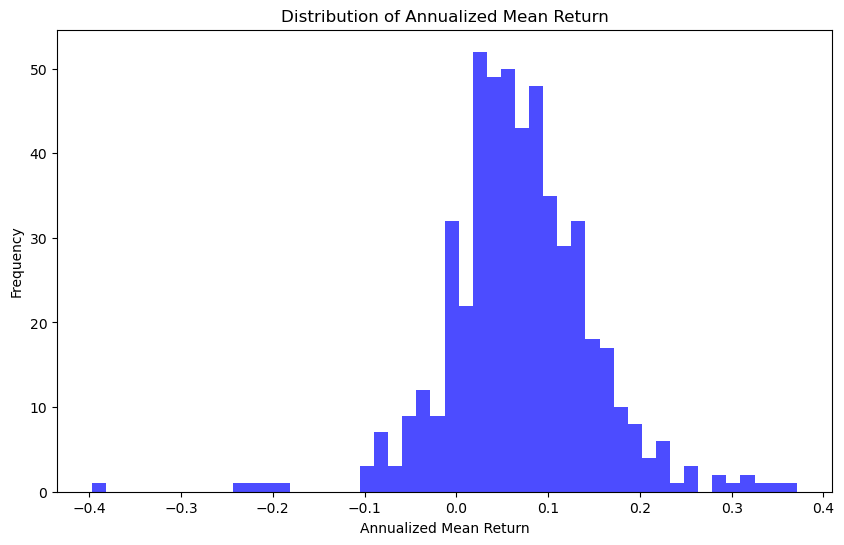

In [254]:
# Annualized mean histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_mean'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Mean Return')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Mean Return')
plt.show()

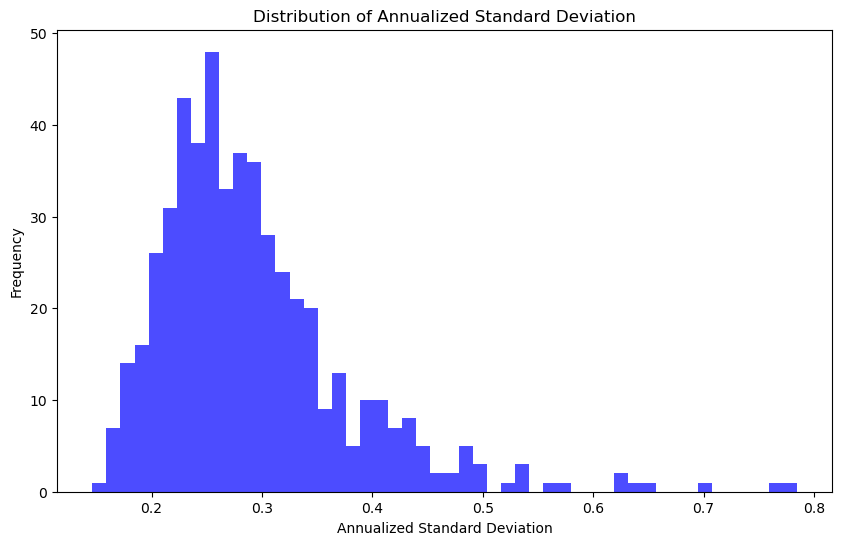

In [255]:
# Annualized std histogram
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_std'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Standard Deviation')
plt.show()

In [256]:
# Variance-covariance matrix
np.corrcoef(annualization['annualized_mean'], annualization['annualized_std'])

array([[1.       , 0.0990692],
       [0.0990692, 1.       ]])

In [376]:
df_ex1.groupby('Name')['individual_monthly_return'].std()

Name
77 BANK                                 0.074258
A2B AUSTRALIA DEAD - DELIST.12/04/24    0.116616
ABC-MART                                0.063681
ACOM                                    0.075747
ADBRI DEAD - DELIST.02/07/24            0.117313
                                          ...   
YAMATO KOGYO                            0.080321
YAMAZAKI BAKING                         0.089757
YOKOGAWA ELECTRIC                       0.083193
YUE YUEN INDL.HDG.                      0.087788
YUEXIU PROPERTY COMPANY                 0.099185
Name: individual_monthly_return, Length: 515, dtype: float64

# **Exercise 2**

In [257]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')


In [333]:
# Risk-free rates dataset
risk_free = pd.read_excel(filepath + 'Risk_Free_Rate.xlsx')
risk_free.rename(columns={'Unnamed: 0': 'year'}, inplace=True)
risk_free['year'] = pd.to_datetime(risk_free['year'], format='%Y%m')

In [259]:
# Merging the datasets
df_ex2 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex2.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex2 = pd.merge(df_ex2, static, on=['Name', 'ISIN'], how='outer')

In [260]:
# Filter region and years of interest
df_ex2 = df_ex2[df_ex2['Region'] == 'PAC']
df_ex2 = df_ex2[(df_ex2['year'] >= '2013-12-31') & (df_ex2['year'] <= '2023-12-31')]

In [261]:
# Returns percentage change and drop the 31.12.2013 rows
df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()
df_ex2.dropna(subset=['pct_monthly_return'], inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_24488\828368418.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex2['pct_monthly_return'] = df_ex2.groupby('Name')['monthly_return'].pct_change()


In [262]:
# Building the equally weighted portfolio
ew_pf = df_ex2.groupby('year')['pct_monthly_return'].sum().reset_index()

In [263]:
# Dividing the return by the number of assets for each month
ew_pf['ew_m_ret'] = 0
for month in df_ex2['year'].unique():
    ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())

C:\Users\simon\AppData\Local\Temp\ipykernel_24488\48976642.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.03157962]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ew_pf.loc[ew_pf['year'] == month, 'ew_m_ret'] = ew_pf.loc[ew_pf['year'] == month, 'pct_monthly_return'] / len(df_ex2[df_ex2['year'] == month]['Name'].unique())


In [264]:
# Calculate the market value share
df_ex2['mv_share'] = df_ex2['monthly_market_value'] / df_ex2.groupby('year')['monthly_market_value'].transform('sum')

In [265]:
# Weight the returns by the market value share
df_ex2['mv_return'] = df_ex2['pct_monthly_return'] * df_ex2['mv_share']

In [266]:
# Market value weighted portfolio
mw_pf = df_ex2.groupby('year')['mv_return'].sum().reset_index()

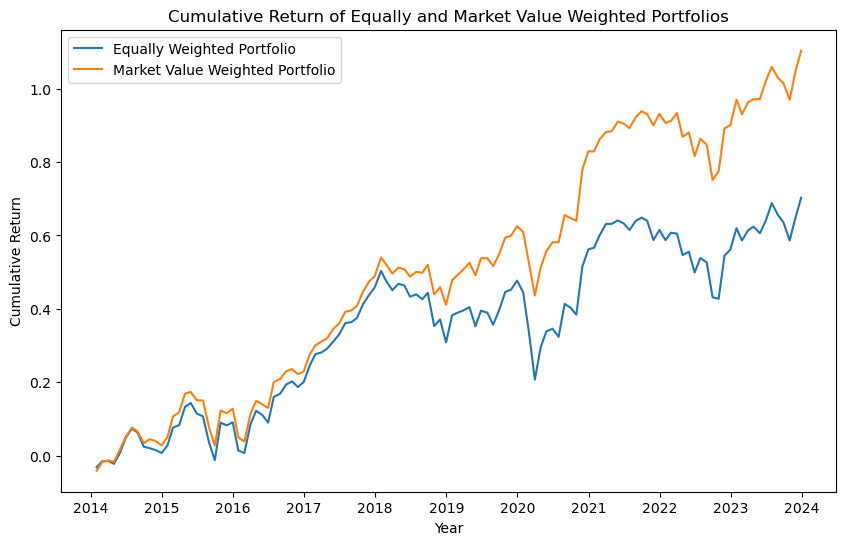

In [284]:
# Plot the monthly adapted returns for both portfolios
plt.figure(figsize=(10, 6))
plt.plot(ew_pf['year'], ew_pf['ew_m_ret'].cumsum(), label='Equally Weighted Portfolio')
plt.plot(mw_pf['year'], mw_pf['mv_return'].cumsum(), label='Market Value Weighted Portfolio')
plt.xlabel('Year')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return of Equally and Market Value Weighted Portfolios')
plt.legend()
plt.show()

In [334]:
# Risk free rate in the given period 
risk_free = risk_free[(risk_free['year'] >= '2013-12-31') & (risk_free['year'] <= '2023-12-31')]
# Annualized risk free rate
ann_rf = risk_free['RF'].mean() * 12

In [337]:
# Statistics of interest Equally Weighted Portfolio
# Annualized return
ew_ann_ret = ew_pf['ew_m_ret'].mean() * 12
# Annualized std
ew_ann_std = ew_pf['ew_m_ret'].std() * np.sqrt(12)
# Sharpe ratio
ew_sharpe = (ew_ann_ret - ann_rf)/ ew_ann_std
#min return
ew_min_ret = ew_pf['ew_m_ret'].min()
#max return
ew_max_ret = ew_pf['ew_m_ret'].max()

# Statistics of interest Market Value Weighted Portfolio
# Annualized return
mw_ann_ret = mw_pf['mv_return'].mean() * 12
# Annualized std
mw_ann_std = mw_pf['mv_return'].std() * np.sqrt(12)
# Sharpe ratio
mw_sharpe = (mw_ann_ret - ann_rf)/ ew_ann_std
#min return
mw_min_ret = mw_pf['mv_return'].min()
#max return
mw_max_ret = mw_pf['mv_return'].max()


In [338]:
statistics = pd.DataFrame({'Portfolio': ['Equally Weighted', 'Market Value Weighted'],
                           'Annualized Return': [ew_ann_ret, mw_ann_ret],
                           'Annualized Standard Deviation': [ew_ann_std, mw_ann_std],
                           'Sharpe Ratio': [ew_sharpe, mw_sharpe],
                           'Min Return': [ew_min_ret, mw_min_ret],
                           'Max Return': [ew_max_ret, mw_max_ret]})
statistics

,Portfolio,Annualized Return,Annualized Standard Deviation,Sharpe Ratio,Min Return,Max Return
0,Equally Weighted,0.070288,0.147188,-7.451105,-0.134936,0.130897
1,Market Value Weighted,0.110312,0.138539,-7.179180,-0.095847,0.139482


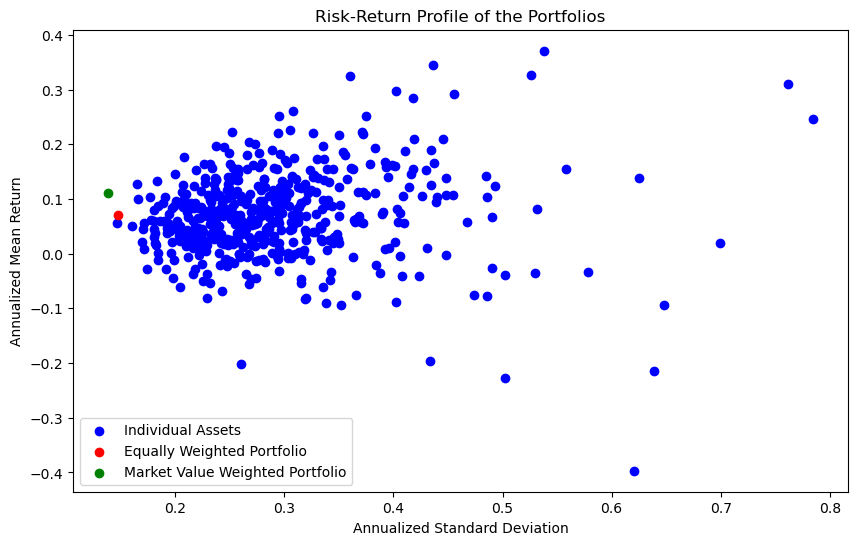

In [271]:
plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

# **Exercise 3**

In [272]:
escore = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
melted_escore = escore.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="escore")
melted_escore.rename(columns={'NAME': 'Name'}, inplace=True)

In [273]:
# Extracting and merging monthly datasets
#monthly returns with dididend payments
M_ret = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
melted_M_ret = M_ret.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
melted_M_ret['year'] = pd.to_datetime(melted_M_ret['year'], format='%Y-%m-%d')
#monthly market value
M_mval = pd.read_excel(filepath + 'DS_MV_USD_M.xlsx')
melted_M_mval = M_mval.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_market_value")
melted_M_mval['year'] = pd.to_datetime(melted_M_mval['year'], format='%Y-%m-%d')
# Merging the datasets
df_ex3 = pd.merge(melted_M_ret, melted_M_mval, on=['NAME', 'ISIN', 'year'], how='outer')
df_ex3.rename(columns={'NAME': 'Name'}, inplace=True)
df_ex3 = pd.merge(df_ex3, static, on=['Name', 'ISIN'], how='outer')
# Filter region and years of interest
df_ex3 = df_ex3[df_ex3['Region'] == 'PAC']
df_ex3 = df_ex3[(df_ex3['year'] >= '2012-12-31') & (df_ex3['year'] <= '2023-12-31')]


In [274]:
# Ensure the 'year' column in escore is datetime type
melted_escore['year'] = pd.to_datetime(melted_escore['year'], format='%Y')

# Merge the dataframes using merge_asof to align yearly escore data with monthly df_ex2 data
df_ex3 = pd.merge_asof(df_ex3.sort_values('year'), 
                                melted_escore.sort_values('year'), 
                                by=['Name', 'ISIN'], 
                                on='year', 
                                direction='backward')

In [275]:
# Returns percentage change and drop the 31.12.2012 rows
df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()
df_ex3.dropna(subset=['pct_monthly_return'], inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_24488\2875317152.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex3['pct_monthly_return'] = df_ex3.groupby('Name')['monthly_return'].pct_change()


In [276]:
df_ex3

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,escore,pct_monthly_return
515,AMADA,JP3122800000,2013-01-31,3.53,2485.2,JP,PAC,59.76,-0.024862
516,LIFESTYLE INTL.HDG. DEAD - DELIST.21/12/22,KYG548561284,2013-01-31,74.10,4276.92,HK,PAC,0.00,0.047794
517,SANTOS,AU000000STO6,2013-01-31,36661.72,11962.11,AU,PAC,55.74,0.085005
518,HAKUHODO DY HDG.,JP3766550002,2013-01-31,1.01,2648.29,JP,PAC,0.00,0.063158
519,TAKASHIMAYA,JP3456000003,2013-01-31,4.05,2439.7,JP,PAC,12.01,0.041131
...,...,...,...,...,...,...,...,...,...
68490,YAMATO KOGYO,JP3940400009,2023-12-29,27.32,3430.73,JP,PAC,NaN,0.045542
68491,ACOM,JP3108600002,2023-12-29,0.79,3914.87,JP,PAC,26.56,0.067568
68492,CONCORDIA FINANCIAL GP.,JP3305990008,2023-12-29,1.12,5384.39,JP,PAC,57.48,-0.026087
68493,MIZUHO FINL.GP.,JP3885780001,2023-12-29,0.40,43452.56,JP,PAC,88.39,0.000000


In [277]:
# Drop companies with any missing escore values
df_ex3 = df_ex3.groupby('Name').filter(lambda x: x['escore'].notnull().all())

In [278]:
df_ex3.sort_values(by=['Name', 'year'], inplace=True)

In [279]:
df_ex3 = df_ex3[(df_ex3['year'].dt.year != 2013) & (df_ex3['year'].dt.year != 2012)]

In [280]:
df_ex3

,Name,ISIN,year,monthly_return,monthly_market_value,Country,Region,escore,pct_monthly_return
6851,77 BANK,JP3352000008,2014-01-31,0.66,1777.62,JP,PAC,15.56,-0.029412
7405,77 BANK,JP3352000008,2014-02-28,0.62,1678.59,JP,PAC,15.56,-0.060606
7835,77 BANK,JP3352000008,2014-03-31,0.64,1726.87,JP,PAC,15.56,0.032258
8290,77 BANK,JP3352000008,2014-04-30,0.64,1729.73,JP,PAC,15.56,0.000000
8921,77 BANK,JP3352000008,2014-05-30,0.68,1838.32,JP,PAC,15.56,0.062500
...,...,...,...,...,...,...,...,...,...
66334,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31,62.82,4989.54,HK,PAC,81.68,-0.055906
66863,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29,58.43,4641.2,HK,PAC,81.68,-0.069882
66952,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31,54.23,4187.66,HK,PAC,81.68,-0.071881
67525,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30,47.52,3669.61,HK,PAC,81.68,-0.123732


In [281]:
df_ex3['mu'] = df_ex3.groupby('Name')['pct_monthly_return'].transform('mean')


df_ex3['sigma'] = df_ex3['pct_monthly_return'] - df_ex3['mu']
df_ex3['sigma2'] = df_ex3['sigma'] ** 2
df_ex3['sigma_exp'] = df_ex3.groupby('Name')['sigma_exp'].transform('mean')

In [285]:
# Create the variance-covariance matrix for pct_monthly_return
cov_matrix = df_ex3.pivot(index='year', columns='Name', values='pct_monthly_return').cov()
cov_matrix

Name,77 BANK,A2B AUSTRALIA DEAD - DELIST.12/04/24,ACOM,ADVANTEST,AEON,AEON FINANCIAL SERVICE,AEON MALL,AGC,AISIN,AJINOMOTO,...,WHARF HOLDINGS,WOOLWORTHS GROUP,WORLEY,YAKULT HONSHA,YAMADA HOLDINGS,YAMAHA,YAMATO HDG.,YOKOGAWA ELECTRIC,YUE YUEN INDL.HDG.,YUEXIU PROPERTY COMPANY
Name,,,,,,,,,,,,,,,,,,,,,
77 BANK,0.005514,0.000911,0.001963,0.001448,0.001145,0.001355,0.001702,0.002039,0.002065,-0.000004,...,0.001108,0.000293,0.001999,0.000845,0.000737,0.000594,0.000615,0.000886,0.000735,0.001754
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.000911,0.013599,0.000353,0.003245,0.000478,0.002570,0.001409,0.002871,0.002910,0.000357,...,0.003288,0.002989,0.008111,-0.001331,0.000824,0.002050,0.001757,0.002662,0.003384,0.001836
ACOM,0.001963,0.000353,0.005738,0.000592,0.001622,0.002632,0.002127,0.001732,0.001493,-0.000009,...,0.000869,0.000302,0.002299,0.000748,0.000856,0.001983,0.000168,0.000246,0.001334,0.000325
ADVANTEST,0.001448,0.003245,0.000592,0.015833,0.000041,0.002248,0.000901,0.002722,0.002449,0.000736,...,0.000196,0.001645,0.005501,-0.000527,-0.000388,0.002248,0.001014,0.003908,0.001355,0.000255
AEON,0.001145,0.000478,0.001622,0.000041,0.003958,0.000997,0.001242,0.000816,0.000465,0.000789,...,0.000994,0.000289,0.001139,0.001489,0.000169,0.001254,0.000826,0.000528,0.000073,0.000466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAMAHA,0.000594,0.002050,0.001983,0.002248,0.001254,0.002660,0.001702,0.001734,0.002156,0.000006,...,0.001321,0.000575,0.004259,0.000921,0.001242,0.007061,0.001305,0.001784,0.002035,0.001490
YAMATO HDG.,0.000615,0.001757,0.000168,0.001014,0.000826,0.000678,0.000842,0.001207,0.001191,0.000897,...,0.000284,0.000966,0.001352,0.001629,0.000812,0.001305,0.005474,0.000634,0.001157,0.000894
YOKOGAWA ELECTRIC,0.000886,0.002662,0.000246,0.003908,0.000528,0.002121,0.001054,0.001968,0.002401,0.000598,...,0.000692,0.001312,0.005239,0.000241,0.000814,0.001784,0.000634,0.006921,0.001865,0.000682


In [286]:
len(cov_matrix)

409

In [287]:
from scipy.optimize import minimize

In [288]:
# Number of assets
num_assets = len(cov_matrix)

# Initial guess for the weights
init_guess = num_assets * [1. / num_assets]

# Constraints: the sum of weights is 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds: weights can only be between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Objective function: portfolio variance
def portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Minimize the portfolio variance
result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
min_variance_weights = result.x

# Display the optimal weights
#min_variance_weights

In [289]:
minvar_pf = df_ex3.groupby('Name')['pct_monthly_return'].mean().reset_index()
minvar_pf['minvar_w'] = min_variance_weights
minvar_pf['annualized_mean'] = minvar_pf['pct_monthly_return'] * 12
minvar_pf['annualized_std'] = minvar_pf['pct_monthly_return'].std() * np.sqrt(12)
# Annualized mean
minvar_ann_ret = (minvar_pf['annualized_mean'] * minvar_pf['minvar_w']).sum()
# Annualized std
minvar_ann_std = minvar_pf['annualized_std'].std() * np.sqrt(12)

In [290]:
# Objective function: negative portfolio return (to maximize return)
def portfolio_return(weights, returns):
    return -np.dot(weights, returns)

# Mean returns of the assets
mean_returns = df_ex3.groupby('Name')['pct_monthly_return'].mean().values

# Minimize the negative portfolio return
result_max_return = minimize(portfolio_return, init_guess, args=(mean_returns,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for maximum return portfolio
max_return_weights = result_max_return.x

# Display the optimal weights
# max_return_weights

In [309]:
# Calculate the annualized return of the minimum variance portfolio
minvar_ann_ret = np.sum(min_variance_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
minvar_ann_std = np.sqrt(np.dot(min_variance_weights.T, np.dot(cov_matrix * 12, min_variance_weights)))

# Calculate the annualized return of the minimum variance portfolio
maxr_ann_ret = np.sum(max_return_weights * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12

# Calculate the annualized standard deviation of the minimum variance portfolio
maxr_ann_std = np.sqrt(np.dot(max_return_weights.T, np.dot(cov_matrix * 12, max_return_weights)))


In [ ]:
# Compute the efficient frontier portofolios
'''target_returns = np.linspace(minvar_ann_ret, maxr_ann_ret, 3)
efficient_frontier = []
for target in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target})
    result = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier.append(result.fun)'''

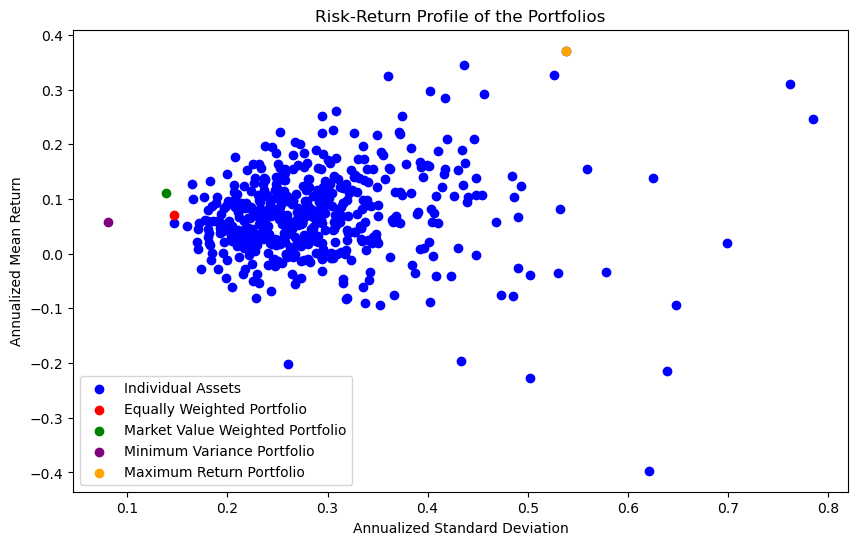

In [321]:
plt.figure(figsize=(10, 6))
plt.scatter(annualization['annualized_std'], annualization['annualized_mean'], color='blue', label='Individual Assets')
plt.scatter(ew_ann_std, ew_ann_ret, color='red', label='Equally Weighted Portfolio')
plt.scatter(mw_ann_std, mw_ann_ret, color='green', label='Market Value Weighted Portfolio')
plt.scatter(minvar_ann_std, minvar_ann_ret, color='purple', label='Minimum Variance Portfolio')
plt.scatter(maxr_ann_std, maxr_ann_ret, color='orange', label='Maximum Return Portfolio')
#plt.plot(efficient_frontier, target_returns, color='black', label='Efficient Frontier')
#plt.plot(np.linspace(minvar_ann_std, maxr_ann_std, 100), np.linspace(minvar_ann_ret, maxr_ann_ret, 100))
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Annualized Mean Return')
plt.title('Risk-Return Profile of the Portfolios')
plt.legend()
plt.show()

In [ ]:
# Target return
target_return = 0.2

# Constraints: the sum of weights is 1 and the portfolio return is the target return
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
               {'type': 'eq', 'fun': lambda x: np.sum(x * df_ex3.groupby('Name')['pct_monthly_return'].mean().values) * 12 - target_return})

# Minimize the portfolio variance
result_target_return = minimize(portfolio_variance, init_guess, args=(cov_matrix,), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights for the target return portfolio
target_return_weights = result_target_return.x

# Calculate the variance of the target return portfolio
target_return_variance = portfolio_variance(target_return_weights, cov_matrix)

target_return_variance